# Table of Contents
* [Reproduction of paper results](#Reproduction-of-paper-results)
* [Optiacal and NIR of M-dwarfs](#Optiacal-and-NIR-of-M-dwarfs)
	* [Figure 4](#Figure-4)
* [Bouchy 2001](#Bouchy-2001)


# Reproduction of paper results

These are exploratory, they do not include everything that was included in the paper.
E.g. convolution by a circular fiber.

To get more familiar with the results and the results from our code.

# Optiacal and NIR of M-dwarfs 

[Artigau et. al. 2018](#cite-artigau_optical_2018) 

https://arxiv.org/pdf/1803.07646.pdf
Try and reproduce the Q plots for Barnard's star (Figure 2)

Using Phoenix Aces model with parameters
- Teff = 3200
- FeH = -0.5
- logg = 5
- vsini < 80 m/s

I do not include/use the vsini here though

I also do not mask out/shade the regions of high telluric absorption.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from eniric.Qcalculator import quality

from astropy.io import fits
from IPython.display import Image

/home/jneal/Phd/Codes/eniric/eniric/__init__.py:20: UserWarning: Using the default config.yaml file located at /home/jneal/Phd/Codes/eniric/eniric/config.yaml. This is likely NOT what you want. Please create a similar 'config.yaml' file in your current working directory.
  "'config.yaml' file in your current working directory.".format(default), UserWarning)


In [2]:
Phoniex_path = os.path.join("/home", "jneal", "Phd", "data", "PHOENIX-ALL","PHOENIX")
wav = fits.getdata(os.path.join(Phoniex_path, "WAVE_PHOENIX-ACES-AGSS-COND-2011.fits"))

# Barnards star Phoenix model
data = fits.getdata(os.path.join(Phoniex_path, "Z-0.5", "lte03200-5.00-0.5.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits"))


In [3]:
wav = wav/10000  # micrometers
mask = (wav >= 0.4) & (wav <= 5)
wav2 = wav[mask]
data2 = data[mask]

In [4]:
def log_chunks(wavelength, percent):
    """Define bounds at which $(Delta \lambda)/\lambda = X\%$"""
    base = 1 + percent/100
    n = np.log(wavelength[-1]/wavelength[0]) / np.log(base)
    powers = np.arange(np.ceil(n))
    
    return wavelength[0] * base ** powers


In [5]:
# Slices of given Delta lambda/lambda

# Break into small chunks 
chunks = np.arange(wav2[0], wav2[-1], 0.01)  # 10 nm chunks
chunks = log_chunks(wav2, 0.2)
print( "len chunks", len(chunks))
print("diff chunks/wav",  (np.diff(chunks)/chunks[:-1])[:5])
# Artigau turn it into 0.2% chunks in which  $(\Delta \lambda) / lambda$ = 0.2% 

qual = []
center = []

for ii in range(len(chunks)-1):
    xmin = chunks[ii]
    xmax = chunks[ii+1]

    this_center = (xmax + xmin)/2
    center.append(this_center)
    m = (wav2 <= xmax) & (wav2 >= xmin)

    qual.append(quality(wav2[m], data2[m]))

len chunks 1265
diff chunks/wav [0.002 0.002 0.002 0.002 0.002]


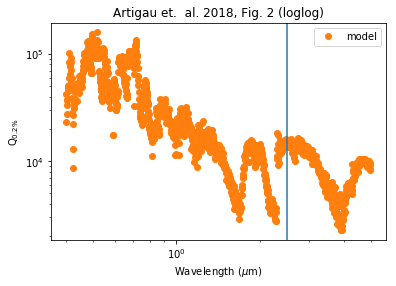

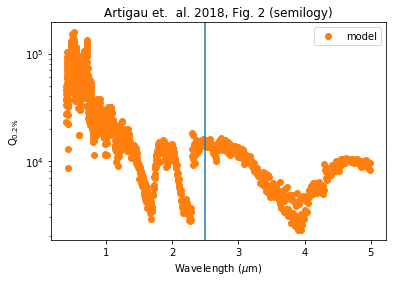

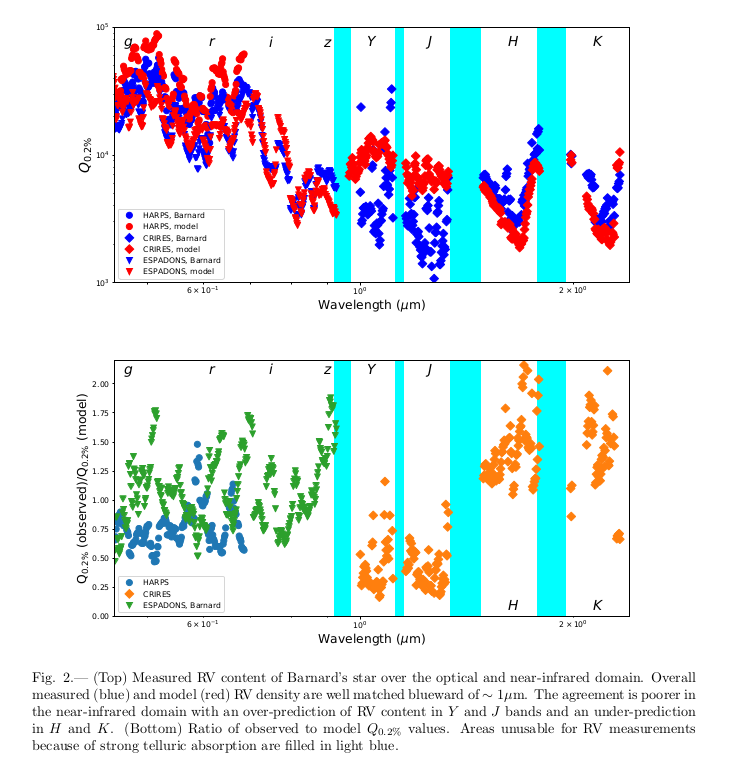

In [6]:

# Plotting with different y scales
plt.loglog(center, qual, "o", label="model", color="C1")
plt.legend()
plt.axvline(2.5)
plt.xlabel("Wavelength ($\mu$m)")
plt.ylabel(r"Q$_{0.2\%}$")
plt.title("Artigau et.  al. 2018, Fig. 2 (loglog)")
plt.show()


plt.semilogy(center, qual, "o", label="model", color="C1")
plt.legend()
plt.axvline(2.5)
plt.xlabel("Wavelength ($\mu$m)")
plt.ylabel(r"Q$_{0.2\%}$")
plt.title("Artigau et.  al. 2018, Fig. 2 (semilogy)")
plt.show()

# Artigau 2018 Fig 2
Image("artigau_fig2.png")

This does not account for the convolution by a 1D profile corresponding to a circular fiber as done in the paper.
Blue vertical line is where they stop in the paper.

## Figure 4

Density of RV across different models, 
- logg = 4.5, z=0 (Young)
- logg = 5, z = 0 (Field)
- logg = 5, z =-0.5 (barnards)

5% steps between 0.5-2.25 micron

In [7]:
Phoenix_path = os.path.join("/home", "jneal", "Phd", "data", "PHOENIX-ALL","PHOENIX")
wav = fits.getdata(os.path.join(Phoenix_path, "WAVE_PHOENIX-ACES-AGSS-COND-2011.fits"))
wav = wav/10000  # micrometers
# Barnards star
barnard = fits.getdata(os.path.join(Phoenix_path, "Z-0.5", "lte03200-5.00-0.5.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits"))
# Field
field = fits.getdata(os.path.join(Phoenix_path, "Z-0.0", "lte03200-5.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits"))
# Young
young = fits.getdata(os.path.join(Phoenix_path, "Z-0.0", "lte03200-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits"))


In [8]:
mask = (wav >= 0.47) & (wav <= 2.6)
wav = wav[mask]
barnard = barnard[mask]
young = young[mask]
field = field[mask]



len chunks 36
diff chunks/wav [0.05 0.05 0.05 0.05 0.05]


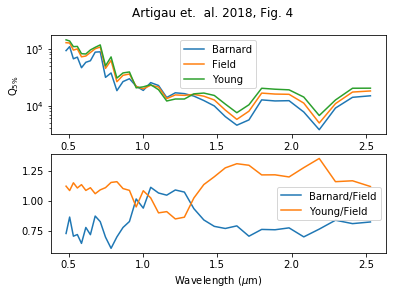

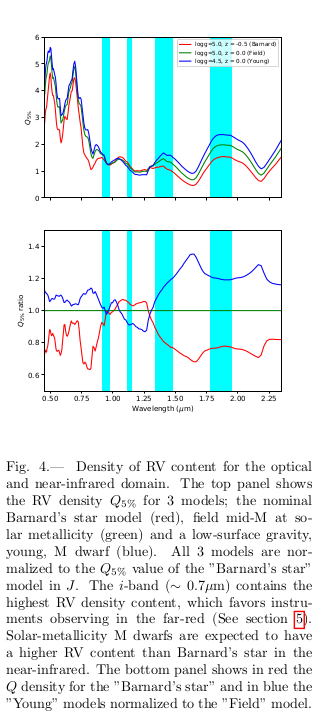

In [9]:
# Slices of given Delta lambda/lambda

# Break into small chunks 
chunks = log_chunks(wav, 5)  # 5%
print( "len chunks", len(chunks))
print("diff chunks/wav",  (np.diff(chunks)/chunks[:-1])[:5])
# Artigau turn it into 0.2% chunks in which  $(\Delta \lambda) / lambda$ = 0.2% 

center_store = {}
qual_store = {}
for target, label in zip([barnard, field, young], ["Barnard", "Field", "Young"]):
    
    qual = []
    center = []

    for ii in range(len(chunks)-1):
        xmin = chunks[ii]
        xmax = chunks[ii+1]

        this_center = (xmax + xmin)/2
        center.append(this_center)
        m = (wav <= xmax) & (wav >= xmin)

        qual.append(quality(wav[m], target[m]))

    qual_store[label] = np.asarray(qual)
    center_store[label] = np.asarray(center)

    
plt.figure()
ax1 = plt.subplot(211)
for label in ["Barnard", "Field", "Young"]:
    plt.semilogy(center_store[label], qual_store[label], label=label)
    plt.legend()
    # plt.axvline(2.5)
    plt.ylabel(r"Q$_{5\%}$")
    
ax2 = plt.subplot(212, sharex=ax1)
for label in ["Barnard", "Young"]:
    plt.plot(center_store[label], qual_store[label]/qual_store["Field"], label="{0}/Field".format(label))
plt.xlabel("Wavelength ($\mu$m)")
plt.suptitle("Artigau et.  al. 2018, Fig. 4")
plt.legend()
plt.show()


# Artigau 2018 Fig 4
Image("artigau_fig4.png")

This shows a similar shape to Artigau 2018, but not quite the same.

# Fundamental photon noise limit

[Bouchy 2001 ](#cite-bouchy_fundamental_2001)

Figure 1 - quality verse optical spectral range 3800-6800 nm
They explore the spectral quality between 4000-7000K  (Table 1)
- K5V - 4500K-4.5
- F9V - 6000K-4.5
- F2V - 7000K-4.5

In [10]:
wav = fits.getdata(os.path.join(Phoniex_path, "WAVE_PHOENIX-ACES-AGSS-COND-2011.fits"))

# Bouchy et. al. 2001
K5V = fits.getdata(os.path.join(Phoniex_path, "Z-0.0", "lte04500-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits"))
F9V = fits.getdata(os.path.join(Phoniex_path, "Z-0.0", "lte06000-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits"))
F2V = fits.getdata(os.path.join(Phoniex_path, "Z-0.0", "lte07000-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits"))


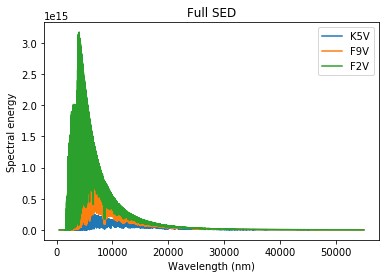

In [11]:
plt.plot(wav, K5V, label="K5V")
plt.plot(wav, F9V, label="F9V")
plt.plot(wav, F2V, label="F2V")
plt.legend()

plt.ylabel("Spectral energy")
plt.xlabel("Wavelength (nm)")
plt.title("Full SED")
plt.show()

In [12]:
mask = (wav >= 3800) & (wav <= 7000)
wav = wav[mask]
K5V = K5V[mask]
F9V = F9V[mask]
F2V = F2V[mask]

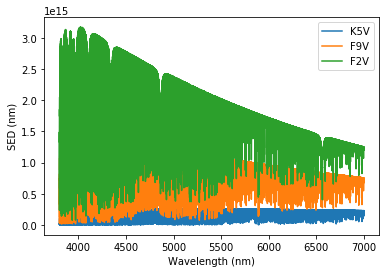

In [13]:
plt.plot(wav, K5V, label="K5V")
plt.plot(wav, F9V, label="F9V")
plt.plot(wav, F2V, label="F2V")
plt.legend()

plt.ylabel("SED (nm)")
plt.xlabel("Wavelength (nm)")
plt.show()

In [14]:
# Is quality the same with SED and counts spectra?
q1 = quality(wav, K5V)
q2 = quality(wav, K5V*wav)
print("K5V", q1, q2)
q1 = quality(wav, F9V)
q2 = quality(wav, F9V*wav)
print("F9V", q1, q2)
q1 = quality(wav, F2V)
q2 = quality(wav, F2V*wav)
print("F2V", q1, q2)

K5V 40617.00329840696 37811.83164663197
F9V 28292.50071123339 26334.037306265924
F2V 19719.928237296528 18435.356927474608


In [15]:
# Is quality the same when scaled?
K5V = K5V * wav
F9V = F9V * wav
F2V = F2V * wav
q1 = quality(wav, K5V)
q2 = quality(wav, K5V*2)
print("K5V", q1, q2)
q1 = quality(wav, F9V)
q2 = quality(wav, F9V*3)
print("F9V", q1, q2)
q1 = quality(wav, F2V)
q2 = quality(wav, F2V*4)
print("F2V", q1, q2)

K5V 37811.83164663197 37811.83164663196
F9V 26334.037306265924 26334.037306265927
F2V 18435.356927474608 18435.356927474608


Yes it is independent of the flux level.

When I was multiplying by wave above it changed the spectral shape, hence a change in quality.

label K5V
label F9V
label F2V


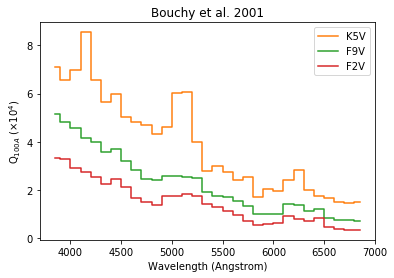

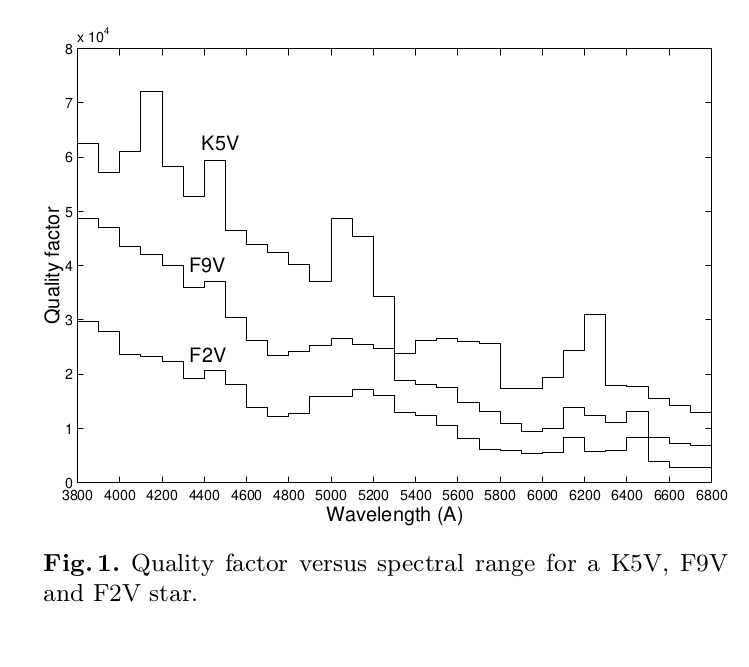

In [18]:
# slices of 100A

# Break into small chunks 
chunks = np.arange(wav[0], wav[-1], 100)  # 10 nm chunks

fluxes = [K5V, F9V, F2V]
labels=["K5V", "F9V", "F2V"]
colors = ["C1", "C2", "C3"]

for f, l, cl in zip(fluxes, labels, colors):
    print("label", l)
    qual = []
    center = []

    for ii in range(len(chunks)-1):
        xmin = chunks[ii]
        xmax = chunks[ii+1]
        
        this_center = (xmax + xmin)/2
        center.append(this_center)
        m = (wav <= xmax) & (wav >= xmin)
        
        qual.append(quality(wav[m], f[m])/1e4)
    plt.step(center, qual, where="mid", label=l, color=cl)


plt.legend()
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel(r"Q$_{100 A}$ ($\times 10^4$)")
plt.title("Bouchy et al. 2001")
plt.show()


# Bouchy 2001 Fig 1
Image("bouchy_fig1.png")

This reproduction is very similar to Bouchy 2001 [2](#cite-bouchy_fundamental_2001) Figure 1. (as it should be) 

The values here are slightly higher than Bouchy. Their plot maximum quality for K5V is ~7.2 (ours is ~8.5)

In [17]:
<!--bibtex
@article{bouchy_fundamental_2001,
  title = {Fundamental Photon Noise Limit to Radial Velocity Measurements},
  volume = {374},
  issn = {0004-6361, 1432-0756},
  doi = {10.1051/0004-6361:20010730},
  number = {2},
  journal = {Astronomy and Astrophysics},
  author = {Bouchy, F. and Pepe, F. and Queloz, D.},
  month = aug,
  year = {2001},
  pages = {733-739},
  file = {/home/jneal/.mozilla/firefox/2rcitvnq.default/zotero/storage/UGSFCJ25/aa1316.pdf},
  note = {00258}
}

@article{artigau_optical_2018,
  archivePrefix = {arXiv},
  eprinttype = {arxiv},
  eprint = {1803.07646},
  title = {Optical and {{Near}}-{{Infrared Radial Velocity Content}} of {{M Dwarfs}}: {{Testing Models}} with {{Barnard}}'s {{Star}}},
  volume = {155},
  issn = {1538-3881},
  shorttitle = {Optical and {{Near}}-{{Infrared Radial Velocity Content}} of {{M Dwarfs}}},
  doi = {10/gddxj4},
  number = {5},
  journal = {The Astronomical Journal},
  author = {Artigau, {\'E}tienne and Malo, Lison and Doyon, Ren{\'e} and Figueira, Pedro and Delfosse, Xavier and Astudillo-Defru, Nicola},
  month = apr,
  year = {2018},
  keywords = {Astrophysics - Instrumentation and Methods for Astrophysics,Astrophysics - Solar and Stellar Astrophysics},
  pages = {198},
  file = {/home/jneal/.mozilla/firefox/2rcitvnq.default/zotero/storage/7FULJUP6/Artigau et al_2018_Optical and Near-Infrared Radial Velocity Content of M Dwarfs.pdf;/home/jneal/.mozilla/firefox/2rcitvnq.default/zotero/storage/VXVUZDVW/1803.html}
}

-->

SyntaxError: invalid syntax (<ipython-input-17-f2a9fc5f6e52>, line 1)

# References

<a name="cite-artigau_optical_2018"/><sup>[^](#ref-1) </sup>Artigau, &Eacute;tienne and Malo, Lison and Doyon, Ren&eacute; and Figueira, Pedro and Delfosse, Xavier and Astudillo-Defru, Nicola. 2018. _Optical and Near-Infrared Radial Velocity Content of M Dwarfs: Testing Models with Barnard's Star_.

<a name="cite-bouchy_fundamental_2001"/><sup>[^](#ref-2) [^](#ref-3) </sup>Bouchy, F. and Pepe, F. and Queloz, D.. 2001. _Fundamental Photon Noise Limit to Radial Velocity Measurements_.

